# Investigación de Operaciones

Proyecto Final - Otoño 2019

## Problema del agente viajero

El problema del agente viajero ( **TSP** por sus siglas en inglés) fue formulado por primera vez en 1930, es uno de los problemas de optimización combinatoria más estudiados y ha sido probado que es NP-duro. Este problema tiene numerosas aplicaciones como repartimiento de paquetes, recoger a un grupo de niños en autobús escolar, encontrar la ruta más corta en transporte público, entre otros.

## Simulated Anneling

Simulated annealing **SA** (recocido simulado, cristalización simulada, templado simulado o enfriamiento simulado) es un algoritmo de búsqueda meta-heurística para problemas de optimización global. El objetivo general de este tipo de algoritmos es encontrar una buena aproximación al valor óptimo de una función en un espacio de búsqueda grande. El método fue descrito independientemente por Scott Kirkpatrick, C. Daniel Gelatt y Mario P. Vecchi en 1983, y por Vlado Černý en 1985.

El nombre e inspiración viene del proceso de recocido del acero y cerámicas, una técnica que consiste en calentar y luego enfriar lentamente el material para variar sus propiedades físicas. El calor causa que los átomos aumenten su energía y que puedan así desplazarse de sus posiciones iniciales (un mínimo local de energía); el enfriamiento lento les da mayores probabilidades de recristalizar en configuraciones con menor energía que la inicial (mínimo global).

# Implementaciones

Se presentan 2 implementaciones:

1. La primera implementación tarda aproximadamente 7 minutos y da como resultado una ruta de aproximadamente 36000.
2. La segunda implementación tarda menos de un minuto y da como resultado una ruta de aproximadamente 21000.

## Implementacion 1

A continuación resolveremos el problema del agente viajero usando Simulated Anneling, usando datos de la localización de 634 ciudades de Luxemburgo con el objetivo de encontrar la forma más barata de visitar todas las ciudades y regresar a su punto de partida. 

Consideraciones:
1. Los costos de viaje son simétricos, es decir, viajar de la ciudad X a la ciudad Y cuesta lo mismo que viajar de Y a X.
2. En el archivo venían 980 ciudades pero quitamos las repetidas dando un total de 634.
3. El punto inicial es la ciudad 1.
3. La implementación se basa en: https://github.com/perrygeo/simanneal

In [6]:
from __future__ import print_function
import math
import random
from simanneal import Annealer

In [7]:
def distance(a, b):
    """Calculamos la distancia Euclideana entre dos puntos redondeada al entero más cercano"""
    x2 = math.pow((b[0] - a[0]),2)
    y2 = math.pow((b[1] - a[1]),2)
    return round(math.sqrt((x2 + y2)))

In [8]:
class TravellingSalesmanProblem(Annealer):

    """Aplicamos Simulated Anneling al problema del agente viajero
    """
    def __init__(self, state, distance_matrix):
        self.distance_matrix = distance_matrix
        super(TravellingSalesmanProblem, self).__init__(state)  

    def move(self):
        """Intercambiamos dos ciudades en la ruta"""
        
        initial_energy = self.energy()
        a = random.randint(0, len(self.state) - 1)
        b = random.randint(0, len(self.state) - 1)
        self.state[a], self.state[b] = self.state[b], self.state[a]

        return self.energy() - initial_energy

    def energy(self):
        """Calculamos el costo total (longuitud) de la ruta"""
        e = 0
        for i in range(len(self.state)):
            e += self.distance_matrix[self.state[i-1]][self.state[i]]
        return e

In [9]:
if __name__ == '__main__':
    cities = {
         ' 0 ' : (49525.5556 ,5940.5556),
         ' 1 ' : (49738.8889 ,6345.0000),
         ' 2 ' : (49608.3333 ,6405.8333),
         ' 3 ' : (49796.6667 ,6155.5556),
         ' 4 ' : (49828.6111 ,5764.7222),
         ' 5 ' : (49757.7778 ,6353.3333),
         ' 6 ' : (49716.3889 ,6490.0000),
         ' 7 ' : (49533.3333 ,6316.6667),
         ' 8 ' : (49616.6667 ,6233.3333),
         ' 9 ' : (49501.3889 ,6352.7778),
         ' 10 ' : (50053.3333 ,5919.1667),
         ' 11 ' : (49967.7778 ,5890.2778),
         ' 12 ' : (49623.6111 ,6136.3889),
         ' 13 ' : (49650.0000 ,6050.0000),
         ' 14 ' : (49968.8889 ,5931.9444),
         ' 15 ' : (49988.8889 ,5999.1667),
         ' 16 ' : (50140.5556 ,6023.8889),
         ' 17 ' : (49938.6111 ,6156.1111),
         ' 18 ' : (49850.0000 ,6116.6667),
         ' 19 ' : (49541.3889 ,6021.6667),
         ' 20 ' : (49750.0000 ,6200.0000),
         ' 21 ' : (49719.7222 ,6200.0000),
         ' 22 ' : (49511.1111 ,5873.8889),
         ' 23 ' : (50155.5556 ,6053.3333),
         ' 24 ' : (49816.9444 ,6088.0556),
         ' 25 ' : (49888.0556 ,6067.7778),
         ' 26 ' : (49523.8889 ,6342.2222),
         ' 27 ' : (49538.0556 ,6284.1667),
         ' 28 ' : (50137.2222 ,6075.0000),
         ' 29 ' : (49566.6667 ,6116.6667),
         ' 30 ' : (49600.0000 ,6150.0000),
         ' 31 ' : (49866.6667 ,6216.6667),
         ' 32 ' : (49963.6111 ,6124.1667),
         ' 33 ' : (49540.8333 ,6200.8333),
         ' 34 ' : (49833.3333 ,6382.7778),
         ' 35 ' : (50104.4444 ,5946.1111),
         ' 36 ' : (49972.7778 ,5941.9444),
         ' 37 ' : (50038.3333 ,5989.4444),
         ' 38 ' : (49691.3889 ,6388.3333),
         ' 39 ' : (49816.6667 ,6250.0000),
         ' 40 ' : (49944.1667 ,5785.8333),
         ' 41 ' : (49710.0000 ,6500.2778),
         ' 42 ' : (49854.4444 ,6095.0000),
         ' 43 ' : (49800.0000 ,5866.6667),
         ' 44 ' : (49658.3333 ,6137.2222),
         ' 45 ' : (49926.6667 ,6173.6111),
         ' 46 ' : (49555.0000 ,6287.5000),
         ' 47 ' : (49788.8889 ,6286.6667),
         ' 48 ' : (49816.6667 ,6300.0000),
         ' 49 ' : (49985.2778 ,6126.6667),
         ' 50 ' : (49836.6667 ,5906.3889),
         ' 51 ' : (49803.0556 ,6000.0000),
         ' 52 ' : (49935.0000 ,6208.8889),
         ' 53 ' : (49769.7222 ,5982.2222),
         ' 54 ' : (50075.5556 ,6046.6667),
         ' 55 ' : (50001.6667 ,6145.5556),
         ' 56 ' : (50121.1111 ,6000.2778),
         ' 57 ' : (49628.6111 ,6278.0556),
         ' 58 ' : (49717.7778 ,6010.2778),
         ' 59 ' : (50064.4444 ,5883.0556),
         ' 60 ' : (50046.1111 ,5878.0556),
         ' 61 ' : (49570.8333 ,6280.5556),
         ' 62 ' : (49960.2778 ,5860.8333),
         ' 63 ' : (49916.6667 ,5783.3333),
         ' 64 ' : (49894.4444 ,6163.6111),
         ' 65 ' : (49700.0000 ,6433.3333),
         ' 66 ' : (49475.8333 ,6042.2222),
         ' 67 ' : (49950.5556 ,5796.1111),
         ' 68 ' : (49897.5000 ,6183.3333),
         ' 69 ' : (49911.3889 ,5995.5556),
         ' 70 ' : (49561.9444 ,6221.6667),
         ' 71 ' : (49903.0556 ,5780.0000),
         ' 72 ' : (49620.5556 ,6073.3333),
         ' 73 ' : (49967.2222 ,6167.7778),
         ' 74 ' : (50078.8889 ,5958.0556),
         ' 75 ' : (49676.9444 ,6123.8889),
         ' 76 ' : (49696.1111 ,5920.2778),
         ' 77 ' : (49811.3889 ,6478.3333),
         ' 78 ' : (49661.3889 ,5919.1667),
         ' 79 ' : (49536.3889 ,6029.4444),
         ' 80 ' : (49830.0000 ,6171.9444),
         ' 81 ' : (49816.6667 ,5866.6667),
         ' 82 ' : (49562.7778 ,6364.4444),
         ' 83 ' : (49581.3889 ,5966.9444),
         ' 84 ' : (49965.0000 ,5826.6667),
         ' 85 ' : (49701.1111 ,5967.2222),
         ' 86 ' : (49628.0556 ,6104.4444),
         ' 87 ' : (50010.5556 ,6026.6667),
         ' 88 ' : (49641.9444 ,6239.4444),
         ' 89 ' : (50018.0556 ,5948.8889),
         ' 90 ' : (49853.0556 ,6187.2222),
         ' 91 ' : (49716.6667 ,6133.3333),
         ' 92 ' : (49830.5556 ,5854.4444),
         ' 93 ' : (49722.7778 ,5927.5000),
         ' 94 ' : (49511.6667 ,6356.9444),
         ' 95 ' : (49746.1111 ,5971.9444),
         ' 96 ' : (49716.6667 ,6216.6667),
         ' 97 ' : (49620.5556 ,6268.6111),
         ' 98 ' : (49797.7778 ,6159.1667),
         ' 99 ' : (49605.8333 ,6258.8889),
         ' 100 ' : (49582.5000 ,5956.3889),
         ' 101 ' : (49744.1667 ,6170.8333),
         ' 102 ' : (49718.8889 ,6092.2222),
         ' 103 ' : (49683.3333 ,5950.0000),
         ' 104 ' : (50181.6667 ,6025.2778),
         ' 105 ' : (49933.0556 ,6063.6111),
         ' 106 ' : (49990.5556 ,5857.5000),
         ' 107 ' : (49578.3333 ,6058.8889),
         ' 108 ' : (50010.2778 ,5852.2222),
         ' 109 ' : (49506.3889 ,6012.7778),
         ' 110 ' : (49830.5556 ,6098.6111),
         ' 111 ' : (49590.0000 ,6316.1111),
         ' 112 ' : (49471.6667 ,6365.8333),
         ' 113 ' : (49775.0000 ,6360.5556),
         ' 114 ' : (49893.6111 ,6044.7222),
         ' 115 ' : (49792.2222 ,5975.8333),
         ' 116 ' : (49804.1667 ,6253.8889),
         ' 117 ' : (49548.0556 ,5928.8889),
         ' 118 ' : (50099.4444 ,5997.5000),
         ' 119 ' : (49613.3333 ,6218.8889),
         ' 120 ' : (49695.2778 ,5870.5556),
         ' 121 ' : (49727.2222 ,5986.3889),
         ' 122 ' : (50080.0000 ,5975.5556),
         ' 123 ' : (49460.8333 ,6033.0556),
         ' 124 ' : (49955.8333 ,5924.7222),
         ' 125 ' : (49786.6667 ,6096.1111),
         ' 126 ' : (49797.7778 ,6504.1667),
         ' 127 ' : (49662.5000 ,6302.7778),
         ' 128 ' : (49691.9444 ,6002.2222),
         ' 129 ' : (49794.4444 ,5821.6667),
         ' 130 ' : (49866.9444 ,5773.3333),
         ' 131 ' : (49834.7222 ,5742.7778),
         ' 132 ' : (49622.7778 ,6107.7778),
         ' 133 ' : (49741.6667 ,6114.4444),
         ' 134 ' : (49548.8889 ,6317.2222),
         ' 135 ' : (49546.3889 ,5856.3889),
         ' 136 ' : (49542.2222 ,6150.0000),
         ' 137 ' : (49567.7778 ,6285.0000),
         ' 138 ' : (49574.7222 ,6034.7222),
         ' 139 ' : (50036.6667 ,6131.1111),
         ' 140 ' : (50055.8333 ,6083.6111),
         ' 141 ' : (49531.1111 ,5847.2222),
         ' 142 ' : (49682.5000 ,6289.1667),
         ' 143 ' : (49779.7222 ,5935.2778),
         ' 144 ' : (49546.3889 ,5840.8333),
         ' 145 ' : (49751.6667 ,5957.5000),
         ' 146 ' : (49734.1667 ,6319.4444),
         ' 147 ' : (49916.9444 ,6011.9444),
         ' 148 ' : (49850.2778 ,5901.3889),
         ' 149 ' : (50057.7778 ,6037.5000),
         ' 150 ' : (49746.6667 ,6260.2778),
         ' 151 ' : (49545.0000 ,6366.9444),
         ' 152 ' : (49488.6111 ,6351.6667),
         ' 153 ' : (49868.6111 ,6267.7778),
         ' 154 ' : (49797.2222 ,5953.8889),
         ' 155 ' : (49773.6111 ,5928.0556),
         ' 156 ' : (49765.5556 ,5890.8333),
         ' 157 ' : (49562.5000 ,6008.8889),
         ' 158 ' : (49749.7222 ,6083.0556),
         ' 159 ' : (49656.9444 ,6233.6111),
         ' 160 ' : (49830.8333 ,5845.0000),
         ' 161 ' : (49960.8333 ,6143.0556),
         ' 162 ' : (49616.6667 ,6166.6667),
         ' 163 ' : (49717.5000 ,6120.2778),
         ' 164 ' : (49801.6667 ,5939.1667),
         ' 165 ' : (49673.3333 ,6400.8333),
         ' 166 ' : (49791.1111 ,5934.7222),
         ' 167 ' : (49770.2778 ,6109.1667),
         ' 168 ' : (49549.4444 ,6000.2778),
         ' 169 ' : (49994.4444 ,6013.0556),
         ' 170 ' : (50012.7778 ,6091.3889),
         ' 171 ' : (49916.6667 ,6000.0000),
         ' 172 ' : (49616.6667 ,6133.3333),
         ' 173 ' : (49779.7222 ,5809.4444),
         ' 174 ' : (49558.3333 ,5880.5556),
         ' 175 ' : (49811.6667 ,5765.8333),
         ' 176 ' : (49524.4444 ,6129.7222),
         ' 177 ' : (50107.2222 ,6007.7778),
         ' 178 ' : (49778.8889 ,6441.3889),
         ' 179 ' : (49783.8889 ,5904.4444),
         ' 180 ' : (49657.2222 ,6000.2778),
         ' 181 ' : (49668.3333 ,6330.2778),
         ' 182 ' : (49676.1111 ,6315.5556),
         ' 183 ' : (49616.6667 ,6266.6667),
         ' 184 ' : (49596.3889 ,6260.0000),
         ' 185 ' : (50016.6667 ,5860.8333),
         ' 186 ' : (49950.0000 ,6066.6667),
         ' 187 ' : (49833.3333 ,6100.0000),
         ' 188 ' : (49730.2778 ,5843.8889),
         ' 189 ' : (49833.3333 ,6016.6667),
         ' 190 ' : (49513.6111 ,5896.1111),
         ' 191 ' : (49577.5000 ,5910.8333),
         ' 192 ' : (49777.5000 ,6150.5556),
         ' 193 ' : (49848.0556 ,6035.5556),
         ' 194 ' : (50007.2222 ,6146.6667),
         ' 195 ' : (49646.6667 ,6400.5556),
         ' 196 ' : (49768.6111 ,5820.0000),
         ' 197 ' : (50156.6667 ,5978.6111),
         ' 198 ' : (49653.6111 ,6241.1111),
         ' 199 ' : (49941.3889 ,5882.7778),
         ' 200 ' : (49675.2778 ,6008.8889),
         ' 201 ' : (49786.9444 ,6174.7222),
         ' 202 ' : (49789.1667 ,5857.7778),
         ' 203 ' : (49509.1667 ,6056.1111),
         ' 204 ' : (49979.7222 ,5910.8333),
         ' 205 ' : (49742.2222 ,5926.1111),
         ' 206 ' : (49947.5000 ,5979.1667),
         ' 207 ' : (49701.6667 ,5916.3889),
         ' 208 ' : (49969.1667 ,5923.0556),
         ' 209 ' : (50011.6667 ,5843.6111),
         ' 210 ' : (49933.3333 ,6066.6667),
         ' 211 ' : (49755.2778 ,5912.2222),
         ' 212 ' : (49536.1111 ,5893.0556),
         ' 213 ' : (49567.5000 ,5910.2778),
         ' 214 ' : (49855.5556 ,6047.2222),
         ' 215 ' : (49631.3889 ,6403.6111),
         ' 216 ' : (49758.3333 ,5826.9444),
         ' 217 ' : (50145.8333 ,5983.8889),
         ' 218 ' : (49883.3333 ,6200.0000),
         ' 219 ' : (49647.5000 ,6260.0000),
         ' 220 ' : (49877.5000 ,5887.2222),
         ' 221 ' : (50080.5556 ,5921.6667),
         ' 222 ' : (49900.0000 ,5950.0000),
         ' 223 ' : (49700.0000 ,5900.0000),
         ' 224 ' : (49566.6667 ,5933.3333),
         ' 225 ' : (49619.4444 ,6240.0000),
         ' 226 ' : (49616.3889 ,6156.6667),
         ' 227 ' : (50028.8889 ,6066.6667),
         ' 228 ' : (49948.3333 ,6129.4444),
         ' 229 ' : (49629.1667 ,6267.5000),
         ' 230 ' : (50033.6111 ,6038.6111),
         ' 231 ' : (49693.8889 ,6442.2222),
         ' 232 ' : (49784.7222 ,6310.8333),
         ' 233 ' : (49680.2778 ,6130.0000),
         ' 234 ' : (49631.6667 ,6119.1667),
         ' 235 ' : (49585.2778 ,6255.5556),
         ' 236 ' : (49733.3333 ,6216.6667),
         ' 237 ' : (49700.0000 ,6116.6667),
         ' 238 ' : (49738.3333 ,6500.0000),
         ' 239 ' : (49748.8889 ,6106.1111),
         ' 240 ' : (49533.0556 ,5988.3333),
         ' 241 ' : (49505.0000 ,6281.1111),
         ' 242 ' : (49746.1111 ,6465.0000),
         ' 243 ' : (49867.7778 ,6239.4444),
         ' 244 ' : (49768.0556 ,6116.6667),
         ' 245 ' : (49866.6667 ,5833.3333),
         ' 246 ' : (49818.6111 ,6020.2778),
         ' 247 ' : (49900.0000 ,6091.9444),
         ' 248 ' : (49761.6667 ,6188.8889),
         ' 249 ' : (49833.8889 ,6007.5000),
         ' 250 ' : (49696.1111 ,6481.3889),
         ' 251 ' : (49954.7222 ,6106.9444),
         ' 252 ' : (49871.9444 ,5972.5000),
         ' 253 ' : (49603.3333 ,6095.5556),
         ' 254 ' : (49962.5000 ,5981.6667),
         ' 255 ' : (49650.8333 ,6303.6111),
         ' 256 ' : (49691.1111 ,6059.1667),
         ' 257 ' : (49572.7778 ,6248.6111),
         ' 258 ' : (49801.9444 ,6218.3333),
         ' 259 ' : (50040.8333 ,6017.5000),
         ' 260 ' : (49923.3333 ,5872.2222),
         ' 261 ' : (49600.0000 ,6250.0000),
         ' 262 ' : (49883.3333 ,5900.0000),
         ' 263 ' : (50117.5000 ,5992.7778),
         ' 264 ' : (49930.8333 ,6037.2222),
         ' 265 ' : (49900.0000 ,6209.1667),
         ' 266 ' : (50053.3333 ,6061.9444),
         ' 267 ' : (49710.0000 ,6061.6667),
         ' 268 ' : (50051.6667 ,6074.7222),
         ' 269 ' : (49702.7778 ,6426.3889),
         ' 270 ' : (49627.5000 ,6023.3333),
         ' 271 ' : (49716.6667 ,6183.3333),
         ' 272 ' : (49789.4444 ,5839.7222),
         ' 273 ' : (49810.5556 ,5918.6111),
         ' 274 ' : (49733.3333 ,6133.3333),
         ' 275 ' : (49700.0000 ,5983.3333),
         ' 276 ' : (49516.6667 ,6166.6667),
         ' 277 ' : (49883.3333 ,6233.3333),
         ' 278 ' : (49750.0000 ,5850.0000),
         ' 279 ' : (49700.0000 ,6283.3333),
         ' 280 ' : (49766.6667 ,6450.0000),
         ' 281 ' : (49822.2222 ,5855.8333),
         ' 282 ' : (49516.6667 ,5850.0000),
         ' 283 ' : (49833.3333 ,6183.3333),
         ' 284 ' : (49655.5556 ,6434.4444),
         ' 285 ' : (49611.6667 ,6130.0000),
         ' 286 ' : (49909.4444 ,5890.8333),
         ' 287 ' : (50060.0000 ,5941.9444),
         ' 288 ' : (49859.4444 ,5851.1111),
         ' 289 ' : (49694.7222 ,6142.5000),
         ' 290 ' : (49898.8889 ,6205.2778),
         ' 291 ' : (49530.2778 ,6120.2778),
         ' 292 ' : (49918.6111 ,6086.6667),
         ' 293 ' : (49715.8333 ,6133.6111),
         ' 294 ' : (49565.8333 ,5886.6667),
         ' 295 ' : (49620.8333 ,6121.6667),
         ' 296 ' : (49558.8889 ,5980.5556),
         ' 297 ' : (50124.4444 ,6110.0000),
         ' 298 ' : (49910.0000 ,5877.5000),
         ' 299 ' : (49739.7222 ,5856.6667),
         ' 300 ' : (49568.3333 ,6065.2778),
         ' 301 ' : (50070.0000 ,5978.0556),
         ' 302 ' : (49598.6111 ,6368.0556),
         ' 303 ' : (49983.6111 ,6014.4444),
         ' 304 ' : (49799.4444 ,6086.1111),
         ' 305 ' : (49716.1111 ,6436.3889),
         ' 306 ' : (50160.8333 ,6108.8889),
         ' 307 ' : (49800.0000 ,6100.0000),
         ' 308 ' : (49790.0000 ,6388.3333),
         ' 309 ' : (50119.1667 ,6083.3333),
         ' 310 ' : (49525.0000 ,5837.5000),
         ' 311 ' : (49776.9444 ,6221.1111),
         ' 312 ' : (49798.6111 ,5835.2778),
         ' 313 ' : (49924.4444 ,6130.2778),
         ' 314 ' : (49596.6667 ,5875.8333),
         ' 315 ' : (49870.5556 ,5903.0556),
         ' 316 ' : (49791.9444 ,6132.7778),
         ' 317 ' : (49535.5556 ,6146.9444),
         ' 318 ' : (49670.0000 ,5950.0000),
         ' 319 ' : (49664.4444 ,6073.0556),
         ' 320 ' : (49974.7222 ,6054.1667),
         ' 321 ' : (49838.0556 ,5840.2778),
         ' 322 ' : (49728.3333 ,6210.2778),
         ' 323 ' : (49561.1111 ,6112.2222),
         ' 324 ' : (50069.4444 ,6070.5556),
         ' 325 ' : (49750.2778 ,6306.1111),
         ' 326 ' : (49741.9444 ,6018.6111),
         ' 327 ' : (50013.3333 ,5964.7222),
         ' 328 ' : (50054.7222 ,6031.3889),
         ' 329 ' : (49532.5000 ,6355.2778),
         ' 330 ' : (50019.4444 ,5968.0556),
         ' 331 ' : (49646.3889 ,5916.3889),
         ' 332 ' : (49623.8889 ,6149.4444),
         ' 333 ' : (49903.3333 ,6135.0000),
         ' 334 ' : (49674.7222 ,6320.5556),
         ' 335 ' : (49694.4444 ,6069.4444),
         ' 336 ' : (49900.8333 ,6037.2222),
         ' 337 ' : (49668.3333 ,6035.8333),
         ' 338 ' : (49489.1667 ,6039.7222),
         ' 339 ' : (49952.7778 ,6020.0000),
         ' 340 ' : (49921.3889 ,5903.0556),
         ' 341 ' : (49739.4444 ,5970.5556),
         ' 342 ' : (49866.6667 ,6233.3333),
         ' 343 ' : (49634.4444 ,6355.8333),
         ' 344 ' : (49645.0000 ,5990.8333),
         ' 345 ' : (49644.4444 ,5984.4444),
         ' 346 ' : (49778.3333 ,5895.0000),
         ' 347 ' : (50102.7778 ,6113.0556),
         ' 348 ' : (49631.3889 ,5917.7778),
         ' 349 ' : (49707.2222 ,6253.0556),
         ' 350 ' : (49716.6667 ,6366.6667),
         ' 351 ' : (49816.6667 ,5950.0000),
         ' 352 ' : (49584.1667 ,6173.6111),
         ' 353 ' : (49474.4444 ,6079.4444),
         ' 354 ' : (49901.6667 ,5884.7222),
         ' 355 ' : (49851.9444 ,6134.7222),
         ' 356 ' : (49697.5000 ,6197.5000),
         ' 357 ' : (49599.7222 ,6387.7778),
         ' 358 ' : (49736.1111 ,5898.6111),
         ' 359 ' : (50096.1111 ,6059.1667),
         ' 360 ' : (49696.6667 ,6131.6667),
         ' 361 ' : (49516.9444 ,6065.0000),
         ' 362 ' : (50164.7222 ,6015.0000),
         ' 363 ' : (50133.3333 ,6066.6667),
         ' 364 ' : (49722.5000 ,5907.2222),
         ' 365 ' : (49950.0000 ,5800.0000),
         ' 366 ' : (49810.0000 ,5866.6667),
         ' 367 ' : (49650.8333 ,6235.0000),
         ' 368 ' : (50017.7778 ,6093.3333),
         ' 369 ' : (49973.0556 ,6091.6667),
         ' 370 ' : (49947.2222 ,6081.6667),
         ' 371 ' : (50083.3333 ,6000.0000),
         ' 372 ' : (49985.0000 ,6073.3333),
         ' 373 ' : (49616.3889 ,5990.2778),
         ' 374 ' : (49807.2222 ,5791.6667),
         ' 375 ' : (49602.5000 ,6124.1667),
         ' 376 ' : (50123.6111 ,6049.4444),
         ' 377 ' : (49713.0556 ,6050.8333),
         ' 378 ' : (49632.5000 ,6220.8333),
         ' 379 ' : (50099.7222 ,5923.3333),
         ' 380 ' : (49883.8889 ,6258.0556),
         ' 381 ' : (49688.6111 ,5914.7222),
         ' 382 ' : (49607.2222 ,5932.2222),
         ' 383 ' : (49776.3889 ,6515.2778),
         ' 384 ' : (49873.0556 ,5931.1111),
         ' 385 ' : (49568.0556 ,6151.3889),
         ' 386 ' : (49750.2778 ,6328.6111),
         ' 387 ' : (49741.6667 ,6427.7778),
         ' 388 ' : (49734.4444 ,6336.1111),
         ' 389 ' : (49652.7778 ,6141.3889),
         ' 390 ' : (49687.2222 ,6143.6111),
         ' 391 ' : (49506.6667 ,6150.5556),
         ' 392 ' : (49857.2222 ,5880.5556),
         ' 393 ' : (49668.6111 ,6142.2222),
         ' 394 ' : (50046.1111 ,5904.1667),
         ' 395 ' : (50096.1111 ,6088.0556),
         ' 396 ' : (49903.6111 ,5962.2222),
         ' 397 ' : (49888.8889 ,5978.8889),
         ' 398 ' : (49762.5000 ,6241.3889),
         ' 399 ' : (49683.3333 ,5933.3333),
         ' 400 ' : (49825.0000 ,5751.1111),
         ' 401 ' : (49520.8333 ,6186.6667),
         ' 402 ' : (49548.6111 ,6209.1667),
         ' 403 ' : (49931.3889 ,5790.0000),
         ' 404 ' : (49606.9444 ,6168.6111),
         ' 405 ' : (49812.5000 ,6282.5000),
         ' 406 ' : (49649.4444 ,5931.6667),
         ' 407 ' : (49687.7778 ,6365.5556),
         ' 408 ' : (50108.0556 ,5923.3333),
         ' 409 ' : (49900.0000 ,5900.0000),
         ' 410 ' : (49835.0000 ,6331.3889),
         ' 411 ' : (49984.4444 ,5872.5000),
         ' 412 ' : (49827.7778 ,5967.2222),
         ' 413 ' : (49880.2778 ,6221.9444),
         ' 414 ' : (49762.5000 ,6033.8889),
         ' 415 ' : (50083.3333 ,6060.0000),
         ' 416 ' : (49674.7222 ,6441.9444),
         ' 417 ' : (49633.3333 ,6200.0000),
         ' 418 ' : (49853.0556 ,5915.8333),
         ' 419 ' : (49831.9444 ,6093.0556),
         ' 420 ' : (49583.8889 ,6359.1667),
         ' 421 ' : (49709.7222 ,5988.3333),
         ' 422 ' : (49734.7222 ,6287.2222),
         ' 423 ' : (49630.8333 ,5891.3889),
         ' 424 ' : (49936.9444 ,6101.6667),
         ' 425 ' : (49660.2778 ,5981.6667),
         ' 426 ' : (49619.1667 ,6354.4444),
         ' 427 ' : (49726.3889 ,6116.9444),
         ' 428 ' : (49921.6667 ,5968.3333),
         ' 429 ' : (49688.8889 ,6248.3333),
         ' 430 ' : (50149.1667 ,6013.3333),
         ' 431 ' : (49669.7222 ,5965.2778),
         ' 432 ' : (49922.5000 ,6054.1667),
         ' 433 ' : (49728.8889 ,6231.9444),
         ' 434 ' : (49742.2222 ,6480.0000),
         ' 435 ' : (49767.2222 ,6498.8889),
         ' 436 ' : (49777.7778 ,6499.4444),
         ' 437 ' : (49866.9444 ,6182.5000),
         ' 438 ' : (49759.1667 ,6387.7778),
         ' 439 ' : (49750.0000 ,6000.0000),
         ' 440 ' : (49585.5556 ,6123.0556),
         ' 441 ' : (49616.6667 ,5952.5000),
         ' 442 ' : (49600.0000 ,6166.6667),
         ' 443 ' : (49666.6667 ,6416.6667),
         ' 444 ' : (49515.0000 ,6191.6667),
         ' 445 ' : (49915.5556 ,6196.1111),
         ' 446 ' : (49814.1667 ,5874.7222),
         ' 447 ' : (49843.0556 ,6204.1667),
         ' 448 ' : (49529.4444 ,6010.8333),
         ' 449 ' : (49899.1667 ,5812.7778),
         ' 450 ' : (49836.1111 ,5789.1667),
         ' 451 ' : (49661.6667 ,6343.6111),
         ' 452 ' : (50075.2778 ,6068.8889),
         ' 453 ' : (49739.7222 ,6187.2222),
         ' 454 ' : (49759.1667 ,6041.1111),
         ' 455 ' : (49603.6111 ,5900.8333),
         ' 456 ' : (49623.8889 ,6202.7778),
         ' 457 ' : (49532.5000 ,6248.3333),
         ' 458 ' : (49816.6667 ,6116.6667),
         ' 459 ' : (49883.3333 ,6166.6667),
         ' 460 ' : (49933.3333 ,5800.0000),
         ' 461 ' : (50150.0000 ,6050.0000),
         ' 462 ' : (49507.5000 ,6287.5000),
         ' 463 ' : (49616.6667 ,6216.6667),
         ' 464 ' : (49562.7778 ,6153.8889),
         ' 465 ' : (49519.7222 ,6078.3333),
         ' 466 ' : (49933.3333 ,6216.6667),
         ' 467 ' : (49774.1667 ,5955.5556),
         ' 468 ' : (49847.5000 ,6104.1667),
         ' 469 ' : (49778.8889 ,6116.6667),
         ' 470 ' : (50062.7778 ,6003.6111),
         ' 471 ' : (49711.3889 ,6310.5556),
         ' 472 ' : (49997.7778 ,5948.8889),
         ' 473 ' : (49911.3889 ,5936.3889),
         ' 474 ' : (49495.8333 ,5980.5556),
         ' 475 ' : (49823.0556 ,5888.3333),
         ' 476 ' : (49886.1111 ,5936.6667),
         ' 477 ' : (49574.4444 ,6275.5556),
         ' 478 ' : (49864.7222 ,6114.7222),
         ' 479 ' : (49544.4444 ,6327.5000),
         ' 480 ' : (49978.0556 ,5948.6111),
         ' 481 ' : (49765.8333 ,6221.9444),
         ' 482 ' : (49675.5556 ,6247.2222),
         ' 483 ' : (49510.2778 ,5943.6111),
         ' 484 ' : (49829.4444 ,6222.7778),
         ' 485 ' : (49844.4444 ,6249.7222),
         ' 486 ' : (49999.4444 ,5992.7778),
         ' 487 ' : (50093.6111 ,5956.6667),
         ' 488 ' : (49486.9444 ,6291.6667),
         ' 489 ' : (49724.7222 ,5917.7778),
         ' 490 ' : (49505.2778 ,6316.3889),
         ' 491 ' : (49520.0000 ,6298.3333),
         ' 492 ' : (49763.8889 ,5857.2222),
         ' 493 ' : (49686.6667 ,6185.2778),
         ' 494 ' : (49685.5556 ,5878.6111),
         ' 495 ' : (49628.8889 ,6131.9444),
         ' 496 ' : (49717.5000 ,5950.0000),
         ' 497 ' : (49524.1667 ,5966.1111),
         ' 498 ' : (49548.8889 ,6016.9444),
         ' 499 ' : (49805.5556 ,6422.2222),
         ' 500 ' : (49480.5556 ,6087.5000),
         ' 501 ' : (50133.6111 ,6019.1667),
         ' 502 ' : (49617.2222 ,6393.8889),
         ' 503 ' : (50017.7778 ,6006.1111),
         ' 504 ' : (50039.1667 ,6079.7222),
         ' 505 ' : (50036.1111 ,6071.3889),
         ' 506 ' : (50062.2222 ,5955.8333),
         ' 507 ' : (49970.0000 ,5837.2222),
         ' 508 ' : (49629.7222 ,6139.1667),
         ' 509 ' : (49921.1111 ,6038.3333),
         ' 510 ' : (49588.3333 ,5983.3333),
         ' 511 ' : (49853.6111 ,6319.1667),
         ' 512 ' : (49726.1111 ,5841.1111),
         ' 513 ' : (49524.1667 ,5891.3889),
         ' 514 ' : (49867.7778 ,6155.8333),
         ' 515 ' : (49777.5000 ,6472.2222),
         ' 516 ' : (50015.0000 ,5889.7222),
         ' 517 ' : (49859.1667 ,5961.3889),
         ' 518 ' : (50065.5556 ,5963.8889),
         ' 519 ' : (49540.8333 ,6259.7222),
         ' 520 ' : (49602.2222 ,5948.3333),
         ' 521 ' : (49935.2778 ,5975.8333),
         ' 522 ' : (50057.7778 ,5898.0556),
         ' 523 ' : (49581.9444 ,6226.6667),
         ' 524 ' : (49773.0556 ,6338.3333),
         ' 525 ' : (49810.2778 ,6097.2222),
         ' 526 ' : (49761.9444 ,6303.3333),
         ' 527 ' : (49611.3889 ,6136.1111),
         ' 528 ' : (49866.6667 ,6183.3333),
         ' 529 ' : (49781.1111 ,6273.6111),
         ' 530 ' : (49826.9444 ,6091.3889),
         ' 531 ' : (49589.4444 ,6106.9444),
         ' 532 ' : (49606.9444 ,6325.8333),
         ' 533 ' : (49725.5556 ,5964.4444),
         ' 534 ' : (49758.0556 ,6478.6111),
         ' 535 ' : (49827.2222 ,5935.8333),
         ' 536 ' : (49750.8333 ,6008.3333),
         ' 537 ' : (49910.0000 ,6067.2222),
         ' 538 ' : (49485.2778 ,6323.0556),
         ' 539 ' : (49900.8333 ,5858.6111),
         ' 540 ' : (49883.0556 ,6098.8889),
         ' 541 ' : (49491.1111 ,6092.5000),
         ' 542 ' : (49933.8889 ,5941.9444),
         ' 543 ' : (49492.7778 ,6069.4444),
         ' 544 ' : (49658.3333 ,6364.7222),
         ' 545 ' : (49981.6667 ,5906.1111),
         ' 546 ' : (49723.6111 ,6342.5000),
         ' 547 ' : (49736.1111 ,6023.0556),
         ' 548 ' : (49658.3333 ,6082.2222),
         ' 549 ' : (49770.8333 ,6304.1667),
         ' 550 ' : (49706.6667 ,6340.5556),
         ' 551 ' : (50124.1667 ,6063.6111),
         ' 552 ' : (49855.5556 ,5903.6111),
         ' 553 ' : (49912.5000 ,6140.0000),
         ' 554 ' : (49656.6667 ,6049.7222),
         ' 555 ' : (50021.3889 ,5911.3889),
         ' 556 ' : (50083.8889 ,5992.5000),
         ' 557 ' : (49775.2778 ,6015.5556),
         ' 558 ' : (49553.8889 ,6329.1667),
         ' 559 ' : (49697.7778 ,6219.7222),
         ' 560 ' : (49701.3889 ,6018.8889),
         ' 561 ' : (49887.7778 ,5816.3889),
         ' 562 ' : (49717.7778 ,6355.0000),
         ' 563 ' : (49754.1667 ,6513.8889),
         ' 564 ' : (49594.4444 ,6150.0000),
         ' 565 ' : (49903.6111 ,5888.0556),
         ' 566 ' : (49851.6667 ,5793.3333),
         ' 567 ' : (50058.3333 ,6066.3889),
         ' 568 ' : (49974.1667 ,5843.8889),
         ' 569 ' : (49683.0556 ,6141.6667),
         ' 570 ' : (49921.9444 ,5849.4444),
         ' 571 ' : (50046.3889 ,5934.1667),
         ' 572 ' : (49923.3333 ,5997.5000),
         ' 573 ' : (50012.2222 ,6052.7778),
         ' 574 ' : (49738.3333 ,6267.2222),
         ' 575 ' : (49697.2222 ,6170.5556),
         ' 576 ' : (50118.0556 ,5979.1667),
         ' 577 ' : (49702.7778 ,6374.7222),
         ' 578 ' : (49960.2778 ,6192.2222),
         ' 579 ' : (49544.4444 ,6137.7778),
         ' 580 ' : (49787.5000 ,6069.4444),
         ' 581 ' : (50118.8889 ,6038.6111),
         ' 582 ' : (49857.5000 ,5825.0000),
         ' 583 ' : (49759.1667 ,6239.7222),
         ' 584 ' : (49860.2778 ,6288.0556),
         ' 585 ' : (49626.3889 ,6336.9444),
         ' 586 ' : (49683.3333 ,6350.0000),
         ' 587 ' : (49876.6667 ,6218.0556),
         ' 588 ' : (49518.6111 ,6102.7778),
         ' 589 ' : (49917.2222 ,6227.7778),
         ' 590 ' : (49795.2778 ,5941.1111),
         ' 591 ' : (49575.8333 ,5983.8889),
         ' 592 ' : (49611.1111 ,6050.0000),
         ' 593 ' : (49743.8889 ,6115.0000),
         ' 594 ' : (49952.2222 ,5856.1111),
         ' 595 ' : (49758.3333 ,6116.9444),
         ' 596 ' : (49677.7778 ,6359.4444),
         ' 597 ' : (49525.0000 ,6042.2222),
         ' 598 ' : (49813.6111 ,6089.1667),
         ' 599 ' : (49766.6667 ,5866.6667),
         ' 600 ' : (49843.6111 ,6268.0556),
         ' 601 ' : (49656.9444 ,6127.5000),
         ' 602 ' : (49813.6111 ,6350.2778),
         ' 603 ' : (49540.2778 ,6129.1667),
         ' 604 ' : (49727.2222 ,6393.8889),
         ' 605 ' : (49512.7778 ,5929.4444),
         ' 606 ' : (50165.5556 ,6088.8889),
         ' 607 ' : (49723.3333 ,6302.5000),
         ' 608 ' : (49649.1667 ,6128.3333),
         ' 609 ' : (49835.8333 ,6291.6667),
         ' 610 ' : (49730.5556 ,5887.2222),
         ' 611 ' : (49746.1111 ,6363.6111),
         ' 612 ' : (49528.0556 ,6353.8889),
         ' 613 ' : (49891.9444 ,6165.2778),
         ' 614 ' : (49898.3333 ,5820.2778),
         ' 615 ' : (49900.0000 ,6050.0000),
         ' 616 ' : (50097.2222 ,5973.0556),
         ' 617 ' : (49552.7778 ,6315.8333),
         ' 618 ' : (49522.7778 ,6224.7222),
         ' 619 ' : (49861.3889 ,5843.8889),
         ' 620 ' : (49702.5000 ,6043.3333),
         ' 621 ' : (49756.3889 ,6160.8333),
         ' 622 ' : (49565.0000 ,6163.6111),
         ' 623 ' : (49510.5556 ,6257.2222),
         ' 624 ' : (49744.1667 ,6328.3333),
         ' 625 ' : (49715.5556 ,6216.6667),
         ' 626 ' : (49971.1111 ,6009.7222),
         ' 627 ' : (50036.6667 ,5870.8333),
         ' 628 ' : (49624.4444 ,6421.6667),
         ' 629 ' : (49533.3333 ,5900.0000),
         ' 630 ' : (49533.6111 ,6080.8333),
         ' 631 ' : (49484.7222 ,6097.7778),
         ' 632 ' : (49530.8333 ,6355.0000),
         ' 633 ' : (49923.0556 ,5878.6111)
    }
    
    # Estado inicial, un itinerario ordenado aleatoriamente
    init_state = list(cities.keys())
    random.shuffle(init_state)

    # Creamos la matrix de distancias
    distance_matrix = {}
    for ka, va in cities.items():
        distance_matrix[ka] = {}
        for kb, vb in cities.items():
            if kb == ka:
                distance_matrix[ka][kb] = 0.0
            else:
                distance_matrix[ka][kb] = distance(va, vb)

    tsp = TravellingSalesmanProblem(init_state, distance_matrix)
    tsp.set_schedule(tsp.auto(minutes=0.2))
    
    tsp.copy_strategy = "slice"
    state, e = tsp.anneal()

    while state[0] != ' 0 ':
        state = state[1:] + state[:1]  #Regresamos a la primera ciudad

    print()
    print("%i mile route:" % e)
    print(" ➞  ".join(state))

 Temperature        Energy    Accept   Improve     Elapsed   Remaining
     0.00000      39265.00     0.40%     0.00%     0:07:37    -1:52:23 Temperature        Energy    Accept   Improve     Elapsed   Remaining
     0.00000      82681.00     4.40%     3.30%     0:00:06     0:00:00


39265 mile route:
 0  ➞   224  ➞   580  ➞   42  ➞   540  ➞   55  ➞   194  ➞   49  ➞   32  ➞   333  ➞   478  ➞   18  ➞   468  ➞   599  ➞   492  ➞   358  ➞   610  ➞   256  ➞   12  ➞   508  ➞   285  ➞   593  ➞   595  ➞   167  ➞   133  ➞   427  ➞   293  ➞   91  ➞   469  ➞   598  ➞   397  ➞   428  ➞   542  ➞   340  ➞   260  ➞   570  ➞   539  ➞   582  ➞   321  ➞   312  ➞   202  ➞   211  ➞   253  ➞   375  ➞   482  ➞   142  ➞   550  ➞   546  ➞   386  ➞   405  ➞   73  ➞   161  ➞   228  ➞   424  ➞   64  ➞   613  ➞   218  ➞   243  ➞   600  ➞   609  ➞   153  ➞   445  ➞   368  ➞   104  ➞   362  ➞   197  ➞   217  ➞   263  ➞   198  ➞   57  ➞   184  ➞   46  ➞   617  ➞   137  ➞   257  ➞   70  ➞   402  ➞   33  ➞   444  ➞   401  ➞   119  ➞   378  ➞   258  ➞   265  ➞   466  ➞   589  ➞   277  ➞   47  ➞   607  ➞   111  ➞   477  ➞   622  ➞   630  ➞   597  ➞   498  ➞   138  ➞   107  ➞   440  ➞   30  ➞   625  ➞   96  ➞   20  ➞   453  ➞   569  ➞   390  ➞   289  ➞   24  ➞   537  ➞   227  ➞   505  ➞   230  ➞   3

In [11]:
import matplotlib.pyplot as plt

def plotTSP(path, points, ids):
    num_iters = 1
    """
    path: camino del vendedor
    points: coordenadas de los puntos
    ids: etiquetas
    
    """

    #creamos los puntos x,y 
    plt.figure(figsize=(20,30))
    x = []; y = []
    for i in paths[0]:
        x.append(points[i][0])
        y.append(points[i][1])
    # Etiquetar los puntos
    for i in paths[0]:
        plt.annotate(ids[i], (x[i],y[i]))
    
     #plt.scatter(x, y)
    # Tamaño de las flechas
    a_scale = float(max(x))/float(10000)

    # Camino
    plt.arrow(x[-1], y[-1], (x[0] - x[-1]), (y[0] - y[-1]), head_width = a_scale, 
            color ='g', length_includes_head=True)
    for i in range(0,len(x)-1):
        plt.arrow(x[i], y[i], (x[i+1] - x[i]), (y[i+1] - y[i]), head_width = a_scale,
                color = 'g', length_includes_head = True)

    #Ejes
    plt.xlim(min(x)-10, max(x)+10)
    plt.ylim(min(y)-10, max(y)+10)
    plt.show()

[0, 224, 580, 42, 540, 55, 194, 49, 32, 333, 478, 18, 468, 599, 492, 358, 610, 256, 12, 508, 285, 593, 595, 167, 133, 427, 293, 91, 469, 598, 397, 428, 542, 340, 260, 570, 539, 582, 321, 312, 202, 211, 253, 375, 482, 142, 550, 546, 386, 405, 73, 161, 228, 424, 64, 613, 218, 243, 600, 609, 153, 445, 368, 104, 362, 197, 217, 263, 198, 57, 184, 46, 617, 137, 257, 70, 402, 33, 444, 401, 119, 378, 258, 265, 466, 589, 277, 47, 607, 111, 477, 622, 630, 597, 498, 138, 107, 440, 30, 625, 96, 20, 453, 569, 390, 289, 24, 537, 227, 505, 230, 37, 480, 36, 565, 220, 273, 117, 605, 465, 603, 317, 136, 463, 88, 247, 105, 327, 330, 472, 545, 106, 507, 516, 10, 287, 486, 370, 313, 553, 325, 146, 532, 632, 612, 26, 94, 490, 488, 241, 623, 364, 278, 374, 566, 130, 71, 449, 614, 476, 485, 39, 413, 528, 419, 517, 475, 366, 160, 245, 619, 288, 392, 351, 125, 244, 575, 356, 271, 21, 239, 246, 189, 124, 11, 62, 594, 199, 439, 326, 525, 458, 98, 80, 283, 201, 101, 621, 274, 393, 233, 360, 237, 304, 171, 69, 396

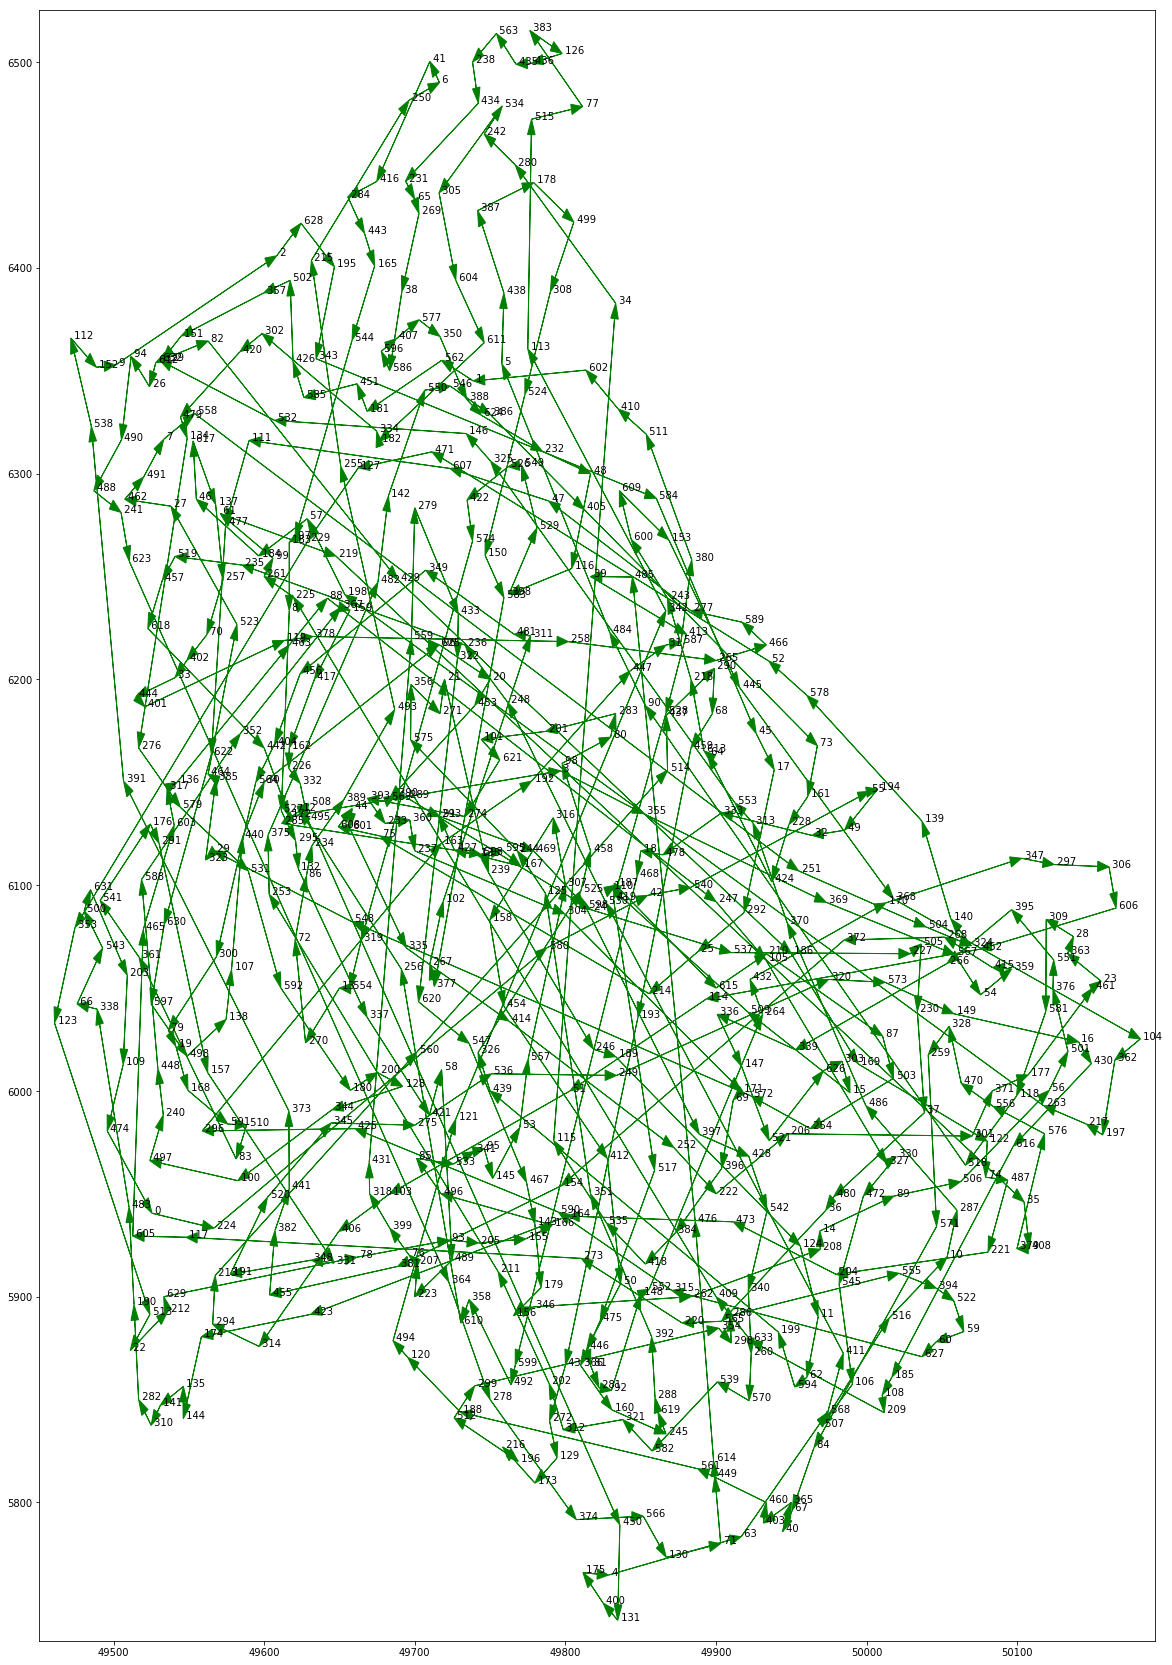

In [12]:
x_cor = [49525.5556 ,49738.8889 ,49608.3333 ,49796.6667 ,49828.6111 ,49757.7778 ,49716.3889 ,49533.3333 ,49616.6667 ,49501.3889 ,50053.3333 ,49967.7778 ,49623.6111 ,49650.0000 ,49968.8889 ,49988.8889 ,50140.5556 ,49938.6111 ,49850.0000 ,49541.3889 ,49750.0000 ,49719.7222 ,49511.1111 ,50155.5556 ,49816.9444 ,49888.0556 ,49523.8889 ,49538.0556 ,50137.2222 ,49566.6667 ,49600.0000 ,49866.6667 ,49963.6111 ,49540.8333 ,49833.3333 ,50104.4444 ,49972.7778 ,50038.3333 ,49691.3889 ,49816.6667 ,49944.1667 ,49710.0000 ,49854.4444 ,49800.0000 ,49658.3333 ,49926.6667 ,49555.0000 ,49788.8889 ,49816.6667 ,49985.2778 ,49836.6667 ,49803.0556 ,49935.0000 ,49769.7222 ,50075.5556 ,50001.6667 ,50121.1111 ,49628.6111 ,49717.7778 ,50064.4444 ,50046.1111 ,49570.8333 ,49960.2778 ,49916.6667 ,49894.4444 ,49700.0000 ,49475.8333 ,49950.5556 ,49897.5000 ,49911.3889 ,49561.9444 ,49903.0556 ,49620.5556 ,49967.2222 ,50078.8889 ,49676.9444 ,49696.1111 ,49811.3889 ,49661.3889 ,49536.3889 ,49830.0000 ,49816.6667 ,49562.7778 ,49581.3889 ,49965.0000 ,49701.1111 ,49628.0556 ,50010.5556 ,49641.9444 ,50018.0556 ,49853.0556 ,49716.6667 ,49830.5556 ,49722.7778 ,49511.6667 ,49746.1111 ,49716.6667 ,49620.5556 ,49797.7778 ,49605.8333 ,49582.5000 ,49744.1667 ,49718.8889 ,49683.3333 ,50181.6667 ,49933.0556 ,49990.5556 ,49578.3333 ,50010.2778 ,49506.3889 ,49830.5556 ,49590.0000 ,49471.6667 ,49775.0000 ,49893.6111 ,49792.2222 ,49804.1667 ,49548.0556 ,50099.4444 ,49613.3333 ,49695.2778 ,49727.2222 ,50080.0000 ,49460.8333 ,49955.8333 ,49786.6667 ,49797.7778 ,49662.5000 ,49691.9444 ,49794.4444 ,49866.9444 ,49834.7222 ,49622.7778 ,49741.6667 ,49548.8889 ,49546.3889 ,49542.2222 ,49567.7778 ,49574.7222 ,50036.6667 ,50055.8333 ,49531.1111 ,49682.5000 ,49779.7222 ,49546.3889 ,49751.6667 ,49734.1667 ,49916.9444 ,49850.2778 ,50057.7778 ,49746.6667 ,49545.0000 ,49488.6111 ,49868.6111 ,49797.2222 ,49773.6111 ,49765.5556 ,49562.5000 ,49749.7222 ,49656.9444 ,49830.8333 ,49960.8333 ,49616.6667 ,49717.5000 ,49801.6667 ,49673.3333 ,49791.1111 ,49770.2778 ,49549.4444 ,49994.4444 ,50012.7778 ,49916.6667 ,49616.6667 ,49779.7222 ,49558.3333 ,49811.6667 ,49524.4444 ,50107.2222 ,49778.8889 ,49783.8889 ,49657.2222 ,49668.3333 ,49676.1111 ,49616.6667 ,49596.3889 ,50016.6667 ,49950.0000 ,49833.3333 ,49730.2778 ,49833.3333 ,49513.6111 ,49577.5000 ,49777.5000 ,49848.0556 ,50007.2222 ,49646.6667 ,49768.6111 ,50156.6667 ,49653.6111 ,49941.3889 ,49675.2778 ,49786.9444 ,49789.1667 ,49509.1667 ,49979.7222 ,49742.2222 ,49947.5000 ,49701.6667 ,49969.1667 ,50011.6667 ,49933.3333 ,49755.2778 ,49536.1111 ,49567.5000 ,49855.5556 ,49631.3889 ,49758.3333 ,50145.8333 ,49883.3333 ,49647.5000 ,49877.5000 ,50080.5556 ,49900.0000 ,49700.0000 ,49566.6667 ,49619.4444 ,49616.3889 ,50028.8889 ,49948.3333 ,49629.1667 ,50033.6111 ,49693.8889 ,49784.7222 ,49680.2778 ,49631.6667 ,49585.2778 ,49733.3333 ,49700.0000 ,49738.3333 ,49748.8889 ,49533.0556 ,49505.0000 ,49746.1111 ,49867.7778 ,49768.0556 ,49866.6667 ,49818.6111 ,49900.0000 ,49761.6667 ,49833.8889 ,49696.1111 ,49954.7222 ,49871.9444 ,49603.3333 ,49962.5000 ,49650.8333 ,49691.1111 ,49572.7778 ,49801.9444 ,50040.8333 ,49923.3333 ,49600.0000 ,49883.3333 ,50117.5000 ,49930.8333 ,49900.0000 ,50053.3333 ,49710.0000 ,50051.6667 ,49702.7778 ,49627.5000 ,49716.6667 ,49789.4444 ,49810.5556 ,49733.3333 ,49700.0000 ,49516.6667 ,49883.3333 ,49750.0000 ,49700.0000 ,49766.6667 ,49822.2222 ,49516.6667 ,49833.3333 ,49655.5556 ,49611.6667 ,49909.4444 ,50060.0000 ,49859.4444 ,49694.7222 ,49898.8889 ,49530.2778 ,49918.6111 ,49715.8333 ,49565.8333 ,49620.8333 ,49558.8889 ,50124.4444 ,49910.0000 ,49739.7222 ,49568.3333 ,50070.0000 ,49598.6111 ,49983.6111 ,49799.4444 ,49716.1111 ,50160.8333 ,49800.0000 ,49790.0000 ,50119.1667 ,49525.0000 ,49776.9444 ,49798.6111 ,49924.4444 ,49596.6667 ,49870.5556 ,49791.9444 ,49535.5556 ,49670.0000 ,49664.4444 ,49974.7222 ,49838.0556 ,49728.3333 ,49561.1111 ,50069.4444 ,49750.2778 ,49741.9444 ,50013.3333 ,50054.7222 ,49532.5000 ,50019.4444 ,49646.3889 ,49623.8889 ,49903.3333 ,49674.7222 ,49694.4444 ,49900.8333 ,49668.3333 ,49489.1667 ,49952.7778 ,49921.3889 ,49739.4444 ,49866.6667 ,49634.4444 ,49645.0000 ,49644.4444 ,49778.3333 ,50102.7778 ,49631.3889 ,49707.2222 ,49716.6667 ,49816.6667 ,49584.1667 ,49474.4444 ,49901.6667 ,49851.9444 ,49697.5000 ,49599.7222 ,49736.1111 ,50096.1111 ,49696.6667 ,49516.9444 ,50164.7222 ,50133.3333 ,49722.5000 ,49950.0000 ,49810.0000 ,49650.8333 ,50017.7778 ,49973.0556 ,49947.2222 ,50083.3333 ,49985.0000 ,49616.3889 ,49807.2222 ,49602.5000 ,50123.6111 ,49713.0556 ,49632.5000 ,50099.7222 ,49883.8889 ,49688.6111 ,49607.2222 ,49776.3889 ,49873.0556 ,49568.0556 ,49750.2778 ,49741.6667 ,49734.4444 ,49652.7778 ,49687.2222 ,49506.6667 ,49857.2222 ,49668.6111 ,50046.1111 ,50096.1111 ,49903.6111 ,49888.8889 ,49762.5000 ,49683.3333 ,49825.0000 ,49520.8333 ,49548.6111 ,49931.3889 ,49606.9444 ,49812.5000 ,49649.4444 ,49687.7778 ,50108.0556 ,49900.0000 ,49835.0000 ,49984.4444 ,49827.7778 ,49880.2778 ,49762.5000 ,50083.3333 ,49674.7222 ,49633.3333 ,49853.0556 ,49831.9444 ,49583.8889 ,49709.7222 ,49734.7222 ,49630.8333 ,49936.9444 ,49660.2778 ,49619.1667 ,49726.3889 ,49921.6667 ,49688.8889 ,50149.1667 ,49669.7222 ,49922.5000 ,49728.8889 ,49742.2222 ,49767.2222 ,49777.7778 ,49866.9444 ,49759.1667 ,49750.0000 ,49585.5556 ,49616.6667 ,49600.0000 ,49666.6667 ,49515.0000 ,49915.5556 ,49814.1667 ,49843.0556 ,49529.4444 ,49899.1667 ,49836.1111 ,49661.6667 ,50075.2778 ,49739.7222 ,49759.1667 ,49603.6111 ,49623.8889 ,49532.5000 ,49816.6667 ,49883.3333 ,49933.3333 ,50150.0000 ,49507.5000 ,49616.6667 ,49562.7778 ,49519.7222 ,49933.3333 ,49774.1667 ,49847.5000 ,49778.8889 ,50062.7778 ,49711.3889 ,49997.7778 ,49911.3889 ,49495.8333 ,49823.0556 ,49886.1111 ,49574.4444 ,49864.7222 ,49544.4444 ,49978.0556 ,49765.8333 ,49675.5556 ,49510.2778 ,49829.4444 ,49844.4444 ,49999.4444 ,50093.6111 ,49486.9444 ,49724.7222 ,49505.2778 ,49520.0000 ,49763.8889 ,49686.6667 ,49685.5556 ,49628.8889 ,49717.5000 ,49524.1667 ,49548.8889 ,49805.5556 ,49480.5556 ,50133.6111 ,49617.2222 ,50017.7778 ,50039.1667 ,50036.1111 ,50062.2222 ,49970.0000 ,49629.7222 ,49921.1111 ,49588.3333 ,49853.6111 ,49726.1111 ,49524.1667 ,49867.7778 ,49777.5000 ,50015.0000 ,49859.1667 ,50065.5556 ,49540.8333 ,49602.2222 ,49935.2778 ,50057.7778 ,49581.9444 ,49773.0556 ,49810.2778 ,49761.9444 ,49611.3889 ,49866.6667 ,49781.1111 ,49826.9444 ,49589.4444 ,49606.9444 ,49725.5556 ,49758.0556 ,49827.2222 ,49750.8333 ,49910.0000 ,49485.2778 ,49900.8333 ,49883.0556 ,49491.1111 ,49933.8889 ,49492.7778 ,49658.3333 ,49981.6667 ,49723.6111 ,49736.1111 ,49658.3333 ,49770.8333 ,49706.6667 ,50124.1667 ,49855.5556 ,49912.5000 ,49656.6667 ,50021.3889 ,50083.8889 ,49775.2778 ,49553.8889 ,49697.7778 ,49701.3889 ,49887.7778 ,49717.7778 ,49754.1667 ,49594.4444 ,49903.6111 ,49851.6667 ,50058.3333 ,49974.1667 ,49683.0556 ,49921.9444 ,50046.3889 ,49923.3333 ,50012.2222 ,49738.3333 ,49697.2222 ,50118.0556 ,49702.7778 ,49960.2778 ,49544.4444 ,49787.5000 ,50118.8889 ,49857.5000 ,49759.1667 ,49860.2778 ,49626.3889 ,49683.3333 ,49876.6667 ,49518.6111 ,49917.2222 ,49795.2778 ,49575.8333 ,49611.1111 ,49743.8889 ,49952.2222 ,49758.3333 ,49677.7778 ,49525.0000 ,49813.6111 ,49766.6667 ,49843.6111 ,49656.9444 ,49813.6111 ,49540.2778 ,49727.2222 ,49512.7778 ,50165.5556 ,49723.3333 ,49649.1667 ,49835.8333 ,49730.5556 ,49746.1111 ,49528.0556 ,49891.9444 ,49898.3333 ,49900.0000 ,50097.2222 ,49552.7778 ,49522.7778 ,49861.3889 ,49702.5000 ,49756.3889 ,49565.0000 ,49510.5556 ,49744.1667 ,49715.5556 ,49971.1111 ,50036.6667 ,49624.4444 ,49533.3333 ,49533.6111 ,49484.7222 ,49530.8333 ,49923.0556]
y_cor = [5940.5556,6345.0000,6405.8333,6155.5556,5764.7222,6353.3333,6490.0000,6316.6667,6233.3333,6352.7778,5919.1667,5890.2778,6136.3889,6050.0000,5931.9444,5999.1667,6023.8889,6156.1111,6116.6667,6021.6667,6200.0000,6200.0000,5873.8889,6053.3333,6088.0556,6067.7778,6342.2222,6284.1667,6075.0000,6116.6667,6150.0000,6216.6667,6124.1667,6200.8333,6382.7778,5946.1111,5941.9444,5989.4444,6388.3333,6250.0000,5785.8333,6500.2778,6095.0000,5866.6667,6137.2222,6173.6111,6287.5000,6286.6667,6300.0000,6126.6667,5906.3889,6000.0000,6208.8889,5982.2222,6046.6667,6145.5556,6000.2778,6278.0556,6010.2778,5883.0556,5878.0556,6280.5556,5860.8333,5783.3333,6163.6111,6433.3333,6042.2222,5796.1111,6183.3333,5995.5556,6221.6667,5780.0000,6073.3333,6167.7778,5958.0556,6123.8889,5920.2778,6478.3333,5919.1667,6029.4444,6171.9444,5866.6667,6364.4444,5966.9444,5826.6667,5967.2222,6104.4444,6026.6667,6239.4444,5948.8889,6187.2222,6133.3333,5854.4444,5927.5000,6356.9444,5971.9444,6216.6667,6268.6111,6159.1667,6258.8889,5956.3889,6170.8333,6092.2222,5950.0000,6025.2778,6063.6111,5857.5000,6058.8889,5852.2222,6012.7778,6098.6111,6316.1111,6365.8333,6360.5556,6044.7222,5975.8333,6253.8889,5928.8889,5997.5000,6218.8889,5870.5556,5986.3889,5975.5556,6033.0556,5924.7222,6096.1111,6504.1667,6302.7778,6002.2222,5821.6667,5773.3333,5742.7778,6107.7778,6114.4444,6317.2222,5856.3889,6150.0000,6285.0000,6034.7222,6131.1111,6083.6111,5847.2222,6289.1667,5935.2778,5840.8333,5957.5000,6319.4444,6011.9444,5901.3889,6037.5000,6260.2778,6366.9444,6351.6667,6267.7778,5953.8889,5928.0556,5890.8333,6008.8889,6083.0556,6233.6111,5845.0000,6143.0556,6166.6667,6120.2778,5939.1667,6400.8333,5934.7222,6109.1667,6000.2778,6013.0556,6091.3889,6000.0000,6133.3333,5809.4444,5880.5556,5765.8333,6129.7222,6007.7778,6441.3889,5904.4444,6000.2778,6330.2778,6315.5556,6266.6667,6260.0000,5860.8333,6066.6667,6100.0000,5843.8889,6016.6667,5896.1111,5910.8333,6150.5556,6035.5556,6146.6667,6400.5556,5820.0000,5978.6111,6241.1111,5882.7778,6008.8889,6174.7222,5857.7778,6056.1111,5910.8333,5926.1111,5979.1667,5916.3889,5923.0556,5843.6111,6066.6667,5912.2222,5893.0556,5910.2778,6047.2222,6403.6111,5826.9444,5983.8889,6200.0000,6260.0000,5887.2222,5921.6667,5950.0000,5900.0000,5933.3333,6240.0000,6156.6667,6066.6667,6129.4444,6267.5000,6038.6111,6442.2222,6310.8333,6130.0000,6119.1667,6255.5556,6216.6667,6116.6667,6500.0000,6106.1111,5988.3333,6281.1111,6465.0000,6239.4444,6116.6667,5833.3333,6020.2778,6091.9444,6188.8889,6007.5000,6481.3889,6106.9444,5972.5000,6095.5556,5981.6667,6303.6111,6059.1667,6248.6111,6218.3333,6017.5000,5872.2222,6250.0000,5900.0000,5992.7778,6037.2222,6209.1667,6061.9444,6061.6667,6074.7222,6426.3889,6023.3333,6183.3333,5839.7222,5918.6111,6133.3333,5983.3333,6166.6667,6233.3333,5850.0000,6283.3333,6450.0000,5855.8333,5850.0000,6183.3333,6434.4444,6130.0000,5890.8333,5941.9444,5851.1111,6142.5000,6205.2778,6120.2778,6086.6667,6133.6111,5886.6667,6121.6667,5980.5556,6110.0000,5877.5000,5856.6667,6065.2778,5978.0556,6368.0556,6014.4444,6086.1111,6436.3889,6108.8889,6100.0000,6388.3333,6083.3333,5837.5000,6221.1111,5835.2778,6130.2778,5875.8333,5903.0556,6132.7778,6146.9444,5950.0000,6073.0556,6054.1667,5840.2778,6210.2778,6112.2222,6070.5556,6306.1111,6018.6111,5964.7222,6031.3889,6355.2778,5968.0556,5916.3889,6149.4444,6135.0000,6320.5556,6069.4444,6037.2222,6035.8333,6039.7222,6020.0000,5903.0556,5970.5556,6233.3333,6355.8333,5990.8333,5984.4444,5895.0000,6113.0556,5917.7778,6253.0556,6366.6667,5950.0000,6173.6111,6079.4444,5884.7222,6134.7222,6197.5000,6387.7778,5898.6111,6059.1667,6131.6667,6065.0000,6015.0000,6066.6667,5907.2222,5800.0000,5866.6667,6235.0000,6093.3333,6091.6667,6081.6667,6000.0000,6073.3333,5990.2778,5791.6667,6124.1667,6049.4444,6050.8333,6220.8333,5923.3333,6258.0556,5914.7222,5932.2222,6515.2778,5931.1111,6151.3889,6328.6111,6427.7778,6336.1111,6141.3889,6143.6111,6150.5556,5880.5556,6142.2222,5904.1667,6088.0556,5962.2222,5978.8889,6241.3889,5933.3333,5751.1111,6186.6667,6209.1667,5790.0000,6168.6111,6282.5000,5931.6667,6365.5556,5923.3333,5900.0000,6331.3889,5872.5000,5967.2222,6221.9444,6033.8889,6060.0000,6441.9444,6200.0000,5915.8333,6093.0556,6359.1667,5988.3333,6287.2222,5891.3889,6101.6667,5981.6667,6354.4444,6116.9444,5968.3333,6248.3333,6013.3333,5965.2778,6054.1667,6231.9444,6480.0000,6498.8889,6499.4444,6182.5000,6387.7778,6000.0000,6123.0556,5952.5000,6166.6667,6416.6667,6191.6667,6196.1111,5874.7222,6204.1667,6010.8333,5812.7778,5789.1667,6343.6111,6068.8889,6187.2222,6041.1111,5900.8333,6202.7778,6248.3333,6116.6667,6166.6667,5800.0000,6050.0000,6287.5000,6216.6667,6153.8889,6078.3333,6216.6667,5955.5556,6104.1667,6116.6667,6003.6111,6310.5556,5948.8889,5936.3889,5980.5556,5888.3333,5936.6667,6275.5556,6114.7222,6327.5000,5948.6111,6221.9444,6247.2222,5943.6111,6222.7778,6249.7222,5992.7778,5956.6667,6291.6667,5917.7778,6316.3889,6298.3333,5857.2222,6185.2778,5878.6111,6131.9444,5950.0000,5966.1111,6016.9444,6422.2222,6087.5000,6019.1667,6393.8889,6006.1111,6079.7222,6071.3889,5955.8333,5837.2222,6139.1667,6038.3333,5983.3333,6319.1667,5841.1111,5891.3889,6155.8333,6472.2222,5889.7222,5961.3889,5963.8889,6259.7222,5948.3333,5975.8333,5898.0556,6226.6667,6338.3333,6097.2222,6303.3333,6136.1111,6183.3333,6273.6111,6091.3889,6106.9444,6325.8333,5964.4444,6478.6111,5935.8333,6008.3333,6067.2222,6323.0556,5858.6111,6098.8889,6092.5000,5941.9444,6069.4444,6364.7222,5906.1111,6342.5000,6023.0556,6082.2222,6304.1667,6340.5556,6063.6111,5903.6111,6140.0000,6049.7222,5911.3889,5992.5000,6015.5556,6329.1667,6219.7222,6018.8889,5816.3889,6355.0000,6513.8889,6150.0000,5888.0556,5793.3333,6066.3889,5843.8889,6141.6667,5849.4444,5934.1667,5997.5000,6052.7778,6267.2222,6170.5556,5979.1667,6374.7222,6192.2222,6137.7778,6069.4444,6038.6111,5825.0000,6239.7222,6288.0556,6336.9444,6350.0000,6218.0556,6102.7778,6227.7778,5941.1111,5983.8889,6050.0000,6115.0000,5856.1111,6116.9444,6359.4444,6042.2222,6089.1667,5866.6667,6268.0556,6127.5000,6350.2778,6129.1667,6393.8889,5929.4444,6088.8889,6302.5000,6128.3333,6291.6667,5887.2222,6363.6111,6353.8889,6165.2778,5820.2778,6050.0000,5973.0556,6315.8333,6224.7222,5843.8889,6043.3333,6160.8333,6163.6111,6257.2222,6328.3333,6216.6667,6009.7222,5870.8333,6421.6667,5900.0000,6080.8333,6097.7778,6355.0000,5878.6111]


points = []

for i in range(0, len(x_cor)):
    points.append((x_cor[i], y_cor[i]))
    
#Convertimos la lista de estados en enteros
b=[]
for m in range(len(state)):
    b= b + [int(state[m])]
paths = [b]
print(b)
# Run the function
plotTSP(paths, points,state)

In [72]:
 plt.close()

## Implementación 2

A continuación resolveremos el problema del agente viajero usando Simulated Anneling, usando datos de la localización de 980 ciudades de Luxemburgo con el objetivo de encontrar la forma más barata de visitar todas las ciudades y regresar a su punto de partida. 

Consideraciones:
1. Los costos de viaje son simétricos, es decir, viajar de la ciudad X a la ciudad Y cuesta lo mismo que viajar de Y a X.
2. Para esta implementación se consideran las 980 ciudades (no quitamos repetidas).
3. La ciudad inicial se genera aleatoriamente.
3. La implementación se basa en: https://github.com/jedrazb/python-tsp-simulated-annealing

In [1]:
from anneal import SimAnneal
import matplotlib.pyplot as plt
import random
import numpy as np

In [2]:
coords = []
with open("dat2.txt", "r") as f:
    for line in f.readlines():
        line = [float(x.replace("\n", "")) for x in line.split(" ")]
        coords.append(line)
        

Se empieza la cristalización
Tamaño de la mejor ruta:  15283.824604696252
Improvement over greedy heuristic:  1.00%


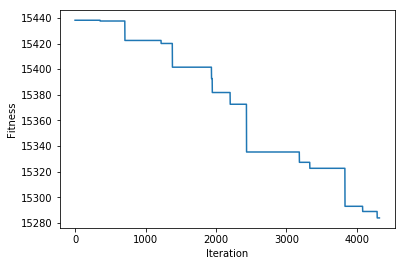

In [3]:
sa = SimAnneal(coords, stopping_iter=5000)
sa.anneal()
sa.plot_learning()

In [4]:
sa.visualize_routes2()

Ruta
 ➞  17 ➞  63 ➞  69 ➞  71 ➞  68 ➞  64 ➞  42 ➞  48 ➞  39 ➞  34 ➞  50 ➞  90 ➞  148 ➞  153 ➞  130 ➞  114 ➞  147 ➞  171 ➞  186 ➞  199 ➞  206 ➞  210 ➞  228 ➞  251 ➞  254 ➞  264 ➞  260 ➞  208 ➞  204 ➞  194 ➞  185 ➞  170 ➞  169 ➞  161 ➞  124 ➞  105 ➞  84 ➞  73 ➞  62 ➞  67 ➞  52 ➞  45 ➞  40 ➞  32 ➞  36 ➞  49 ➞  55 ➞  87 ➞  89 ➞  108 ➞  106 ➞  139 ➞  140 ➞  149 ➞  122 ➞  118 ➞  74 ➞  54 ➞  59 ➞  60 ➞  37 ➞  10 ➞  35 ➞  56 ➞  28 ➞  16 ➞  23 ➞  104 ➞  197 ➞  217 ➞  263 ➞  297 ➞  309 ➞  347 ➞  359 ➞  371 ➞  379 ➞  395 ➞  408 ➞  415 ➞  452 ➞  470 ➞  487 ➞  506 ➞  518 ➞  522 ➞  504 ➞  505 ➞  503 ➞  516 ➞  486 ➞  472 ➞  480 ➞  507 ➞  521 ➞  509 ➞  537 ➞  539 ➞  540 ➞  528 ➞  517 ➞  511 ➞  514 ➞  478 ➞  468 ➞  485 ➞  484 ➞  475 ➞  458 ➞  446 ➞  450 ➞  447 ➞  437 ➞  459 ➞  476 ➞  473 ➞  466 ➞  460 ➞  445 ➞  432 ➞  428 ➞  424 ➞  403 ➞  396 ➞  409 ➞  397 ➞  413 ➞  449 ➞  370 ➞  365 ➞  369 ➞  372 ➞  368 ➞  330 ➞  327 ➞  303 ➞  320 ➞  339 ➞  411 ➞  394 ➞  328 ➞  324 ➞  301 ➞  287 ➞  268 ➞  266 ➞  259 ➞

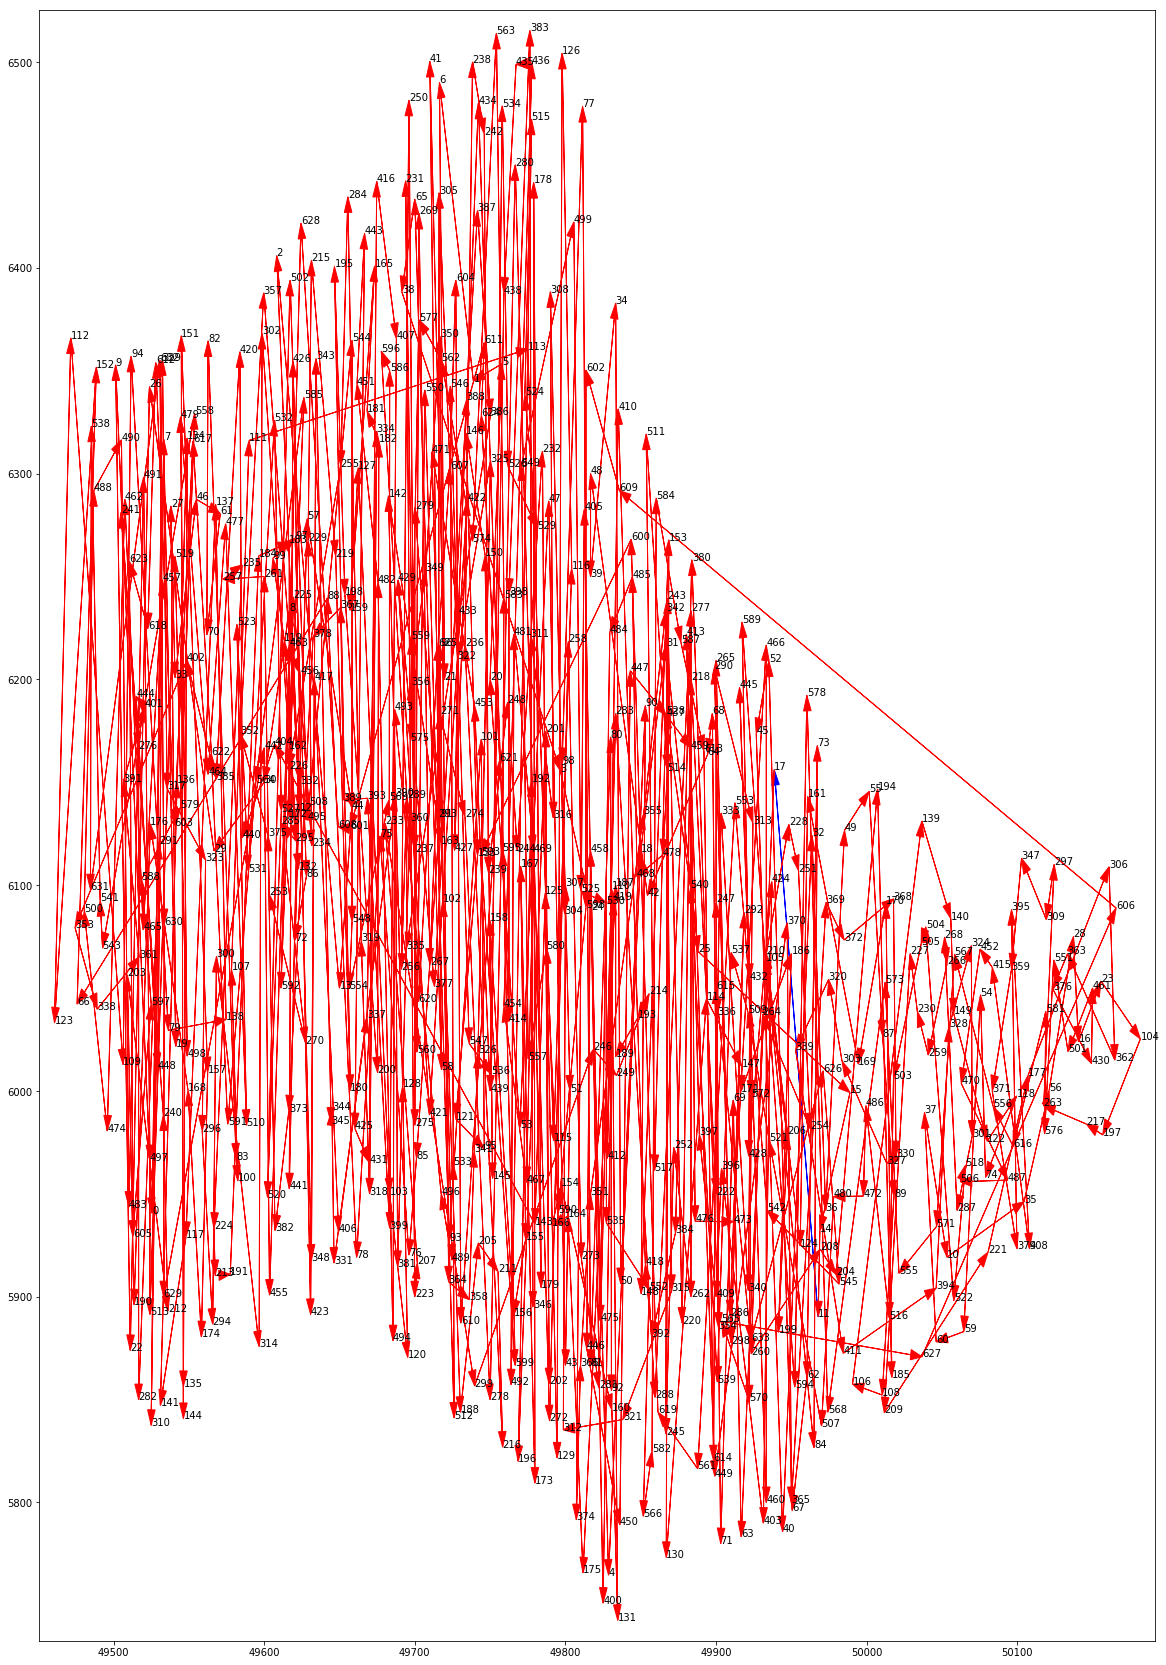

In [5]:
sa.visualize_routes()